# Bank Marketing Targets


> Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets




#1. Intro

In [254]:
# Library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import datetime
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [255]:
class Colors:
  Black = "#000000"
  White = "#FFFFFF"
  Gray = "#5d5d5d"
  LightGray = "#fafafa"
  Teal = "#008080"
  Aquamarine = "#76c8c8"
  Blue = "#2596be"
  LightCyan = "#badbdb"
  WhiteSmoke = "#dedad2"
  Cream = "#e4bcad"
  PeachPuff = "#df979e"
  HotPink = "#d7658b"
  DeepPink = "#c80064"
  LightSeaGreen = "#20B2AA"
  DarkGray = "#464144"

In [256]:
# Import data
link_train = 'https://drive.google.com/file/d/16o9ZVraNNWR8MyRZhkxzhAOsUdhwgXD6/view?usp=drive_link'
link_test = 'https://drive.google.com/file/d/133nQDxCNHDnIANnSE_6enWBRm2okqZAh/view?usp=sharing'
path_train = 'https://drive.google.com/uc?export=download&id='+link_train.split('/')[-2]
path_test = 'https://drive.google.com/uc?export=download&id='+link_test.split('/')[-2]
df = pd.read_csv(path_train, sep =";")
test = pd.read_csv(path_test, sep = ";")

Detailed Column Descriptions bank client data:

* 1 - age (numeric)
* 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
* 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* 4 - education (categorical: "unknown","secondary","primary","tertiary")
* 5 - default: has credit in default? (binary: "yes","no")
* 6 - balance: average yearly balance, in euros (numeric)
* 7 - housing: has housing loan? (binary: "yes","no")
* 8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

* 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

* 10 - day: last contact day of the month (numeric)
* 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
* 12 - duration: last contact duration, in seconds (numeric)

other attributes:

* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

* 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# 2. Explore Data Analysis

## 2.1. Data Understanding

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [258]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [259]:
# rename y column into 'subscribed'
df.rename({'y':'subscribed'}, axis = 1, inplace=True)

In [260]:
# Check if there are any duplicate rows
df.duplicated().sum()

0

As we can see above, no duplications were found.

In [261]:
# Check if there are any nan values in each column.
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

It seems like there were no missing values on our dataframe, but there were some "unknown" values.

In [262]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [263]:
df[df['previous'] == 0].shape

(36954, 17)

Following the table above, we have the conclusions below:

- 50% clients are below 40 years.
- 'balance' column has a very high standard deviation that is surpassing the median value, and it has huge outliers values.
- We can see 'duration' column has values since there is a jump from 319, that represents 75% of the data, to max value of 4918. It also has a very high standard deviation, surpassing the median value.
- As shown on 'pdays' column and 'previous' column, at least 75% customers (36954 customers) were never contacted before.

In [264]:
df.corr().style.background_gradient()

<ipython-input-264-480077e722ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


As shown on the correlation matrix above, there are no significant correlation between the numeric columns.

## 2.2. Handling Outlier

There are three quantitative variables which are 'age', 'balance' and 'duration'. We will handle outliers of them.

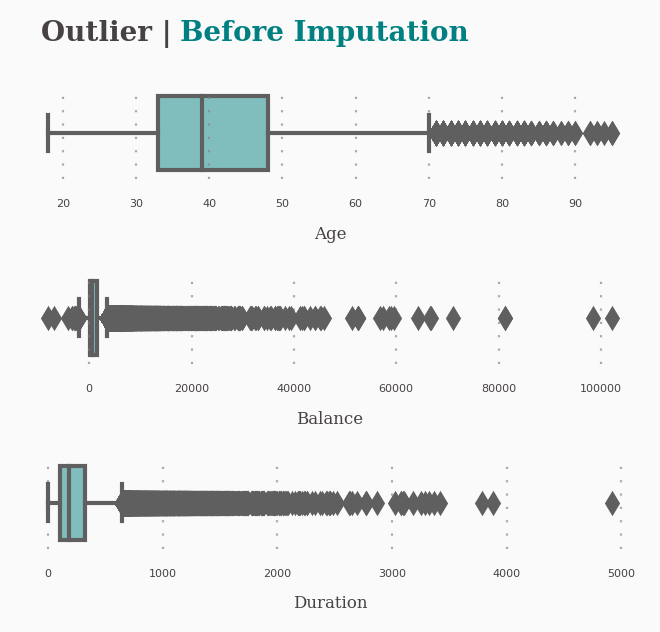

In [265]:
# canvas
fig = plt.figure(figsize=(4,3), dpi=200, facecolor=Colors.LightGray)
gs = fig.add_gridspec(3, 1, hspace=1)

# alignment
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[ax, 0])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="x",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
        alpha=0.65,
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].tick_params(
        axis="x", labelsize=4, bottom=False, labelcolor=Colors.DarkGray
    )
    locals()["axis" + str(ax)].xaxis.set_label_coords(0, -0.5)

    spines = ["top", "left", "right", "bottom"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)

# plot
for ax, col in zip(range(0, 3), ["age", "balance", "duration"]):
    sns.boxplot(data=df, x=col, ax=locals()["axis" + str(ax)], color=Colors.Aquamarine)
    locals()["axis" + str(ax)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=6, color=Colors.DarkGray
    )

# Text
axis0.text(
    17,
    -1,
    "Outlier |",
    fontweight="bold",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
axis0.text(
    36,
    -1,
    "Before Imputation",
    fontweight="bold",
    fontfamily="serif",
    fontsize=10,
    color=Colors.Teal,
)

fig.show()

This data contains outliers, so we must trim it.

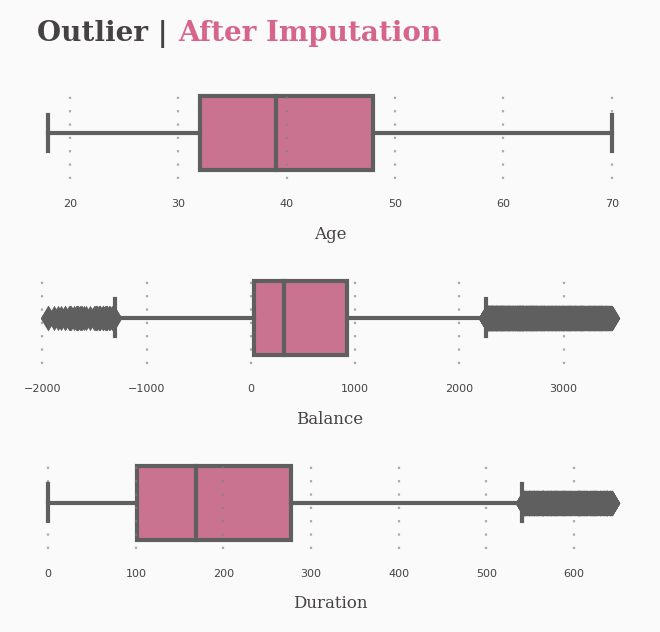

In [266]:
# subset outliers function
def handling_outlier() -> pd.DataFrame:
    cols = [
        "age",
        "balance",
        "duration",
        "day",
        "campaign",
        "pdays",
        "previous"
    ]
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df2 = df[
        ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    ]
    return df2


df2 = handling_outlier()

# canvas
fig = plt.figure(figsize=(4, 3), dpi=200, facecolor=Colors.LightGray)
gs = fig.add_gridspec(3, 1, hspace=1)

# alignment
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[ax, 0])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="x",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
        alpha=0.65,
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].tick_params(
        axis="x", labelsize=4, bottom=False, labelcolor=Colors.DarkGray
    )
    locals()["axis" + str(ax)].xaxis.set_label_coords(0, -0.5)

    spines = ["top", "left", "right", "bottom"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)

# plot
for ax, col in zip(range(0, 3), ["age", "balance", "duration"]):
    sns.boxplot(data=df2, x=col, ax=locals()["axis" + str(ax)], color=Colors.HotPink)
    locals()["axis" + str(ax)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=6, color=Colors.DarkGray
    )

# Text
axis0.text(
    17,
    -1,
    "Outlier |",
    fontweight="bold",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
axis0.text(
    30,
    -1,
    "After Imputation",
    fontweight="bold",
    fontfamily="serif",
    fontsize=10,
    color=Colors.HotPink,
)

fig.show()


In [267]:
print('Data length before imputation is:', len(df))
print('Data length after imputation is:', len(df2))

Data length before imputation is: 45211
Data length after imputation is: 28193


## 2.3. Data Visualization

In [268]:
# subset data preparation function
def data_prep(*var_name, dataframe) -> pd.DataFrame:
  data = dataframe.groupby([*var_name]).size().to_frame(name='count').reset_index()
  return data

In [269]:
# subset data preparation by percentage function
def data_percent(*var_name, dataframe) -> pd.DataFrame:
  data = dataframe.groupby([*var_name]).size().to_frame(name='count').reset_index()
  data['percentage'] = data['count']/sum(data['count'])*100
  return data

### Quantitative Variables

* Age, Balance and Duration

<ipython-input-270-f73669c93839>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= no_subs, x=col, ax=locals()["axis" + str(ax)], shade=True, color=Colors.Teal, alpha=0.9, ec=Colors.DarkGray)
<ipython-input-270-f73669c93839>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= yes_subs, x=col, ax=locals()["axis" + str(ax)], shade=True, color=Colors.Aquamarine, alpha=0.4, ec=Colors.DarkGray)
<ipython-input-270-f73669c93839>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= no_subs, x=col, ax=locals()["axis" + str(ax)], shade=True, color=Colors.Teal, alpha=0.9, ec=Colors.DarkGray)
<ipython-input-270-f73669c9

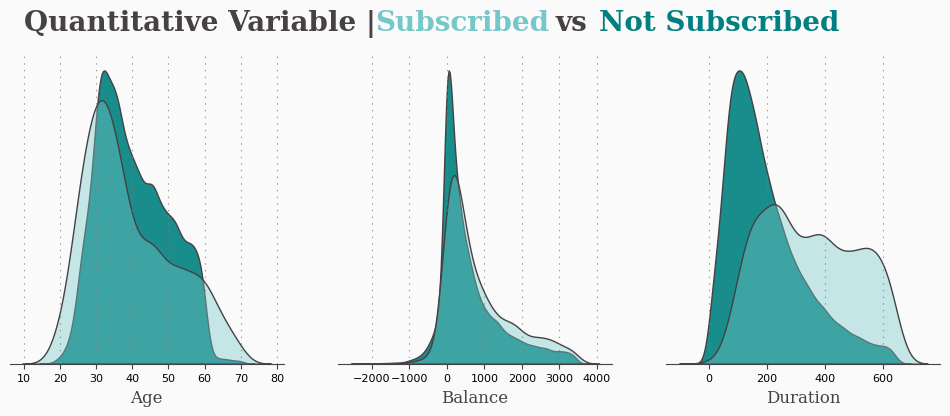

In [270]:
# data
yes_subs = df2.query("subscribed == 'yes'")
no_subs = df2.query("subscribed =='no'")

# canvas
fig = plt.figure(figsize=(12,4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1,3)

# alignment
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[0, ax])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="x",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].tick_params(axis="x", labelsize=8, color=Colors.DarkGray)
    locals()["axis"+str(ax)].get_yaxis().set_visible(False)

    spines = ["top", "left", "right"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)
        locals()["axis"+str(ax)].spines['bottom'].set_color(Colors.DarkGray)
# plot
for ax, col in zip(range(0, 3), ["age", "balance", "duration"]):
    sns.kdeplot(data= no_subs, x=col, ax=locals()["axis" + str(ax)], shade=True, color=Colors.Teal, alpha=0.9, ec=Colors.DarkGray)
    sns.kdeplot(data= yes_subs, x=col, ax=locals()["axis" + str(ax)], shade=True, color=Colors.Aquamarine, alpha=0.4, ec=Colors.DarkGray)
    locals()["axis" + str(ax)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=12, color=Colors.DarkGray
    )

# text
axis0.text(10,0.05, 'Quantitative Variable |',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
axis0.text(107,0.05,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine,)
axis0.text(157,0.05,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
axis0.text(169,0.05,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)

fig.show()

According to the first graph , majority of the customers who said yes to deposit is of age between 25 and 60.

Age variable and Balance variable have the same distributions between subscribed (yes) and not subcribed (no).

However, the Duration variable has a different distribution between subscribed (yes) and not subcribed (no), well, it is clear that the longer the duration of the communication, the stronger the client's interest in subcribing the bank deposit.

* Campaign, pdays and previous

<ipython-input-271-852873f5085d>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= no_subs, x=col, ax=locals()["axis" + str(ax)], shade=True, color=Colors.Teal, alpha=0.9, ec=Colors.DarkGray)
<ipython-input-271-852873f5085d>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= yes_subs, x=col, ax=locals()["axis" + str(ax)], shade=True, color=Colors.Aquamarine, alpha=0.4, ec=Colors.DarkGray)
<ipython-input-271-852873f5085d>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data= no_subs, x=col, ax=locals()["axis" + str(ax)], shade=True, color=Colors.Teal, alpha=0.9, ec=Colors.DarkGray)
<ipython-input-271-852873f5

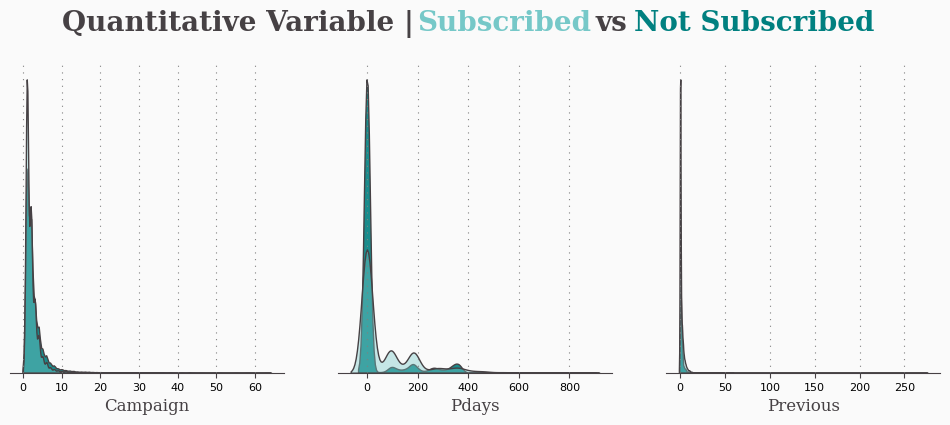

In [271]:
# data
yes_subs = df.query("subscribed == 'yes'")
no_subs = df.query("subscribed =='no'")

# canvas
fig = plt.figure(figsize=(12,4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1,3)

# alignment
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[0, ax])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="x",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].tick_params(axis="x", labelsize=8, color=Colors.DarkGray)
    locals()["axis"+str(ax)].get_yaxis().set_visible(False)

    spines = ["top", "left", "right"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)
        locals()["axis"+str(ax)].spines['bottom'].set_color(Colors.DarkGray)
# plot
for ax, col in zip(range(0, 3), ["campaign", "pdays", "previous"]):
    sns.kdeplot(data= no_subs, x=col, ax=locals()["axis" + str(ax)], shade=True, color=Colors.Teal, alpha=0.9, ec=Colors.DarkGray)
    sns.kdeplot(data= yes_subs, x=col, ax=locals()["axis" + str(ax)], shade=True, color=Colors.Aquamarine, alpha=0.4, ec=Colors.DarkGray)
    locals()["axis" + str(ax)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=12, color=Colors.DarkGray
    )

# text
axis0.text(10,0.65, 'Quantitative Variable |',fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
axis0.text(102,0.65,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine,)
axis0.text(148,0.65,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
axis0.text(158,0.65,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)

fig.show()

These variables have many outliers. They are too hard to be features to predict.

### Classification Variables

* Job Type


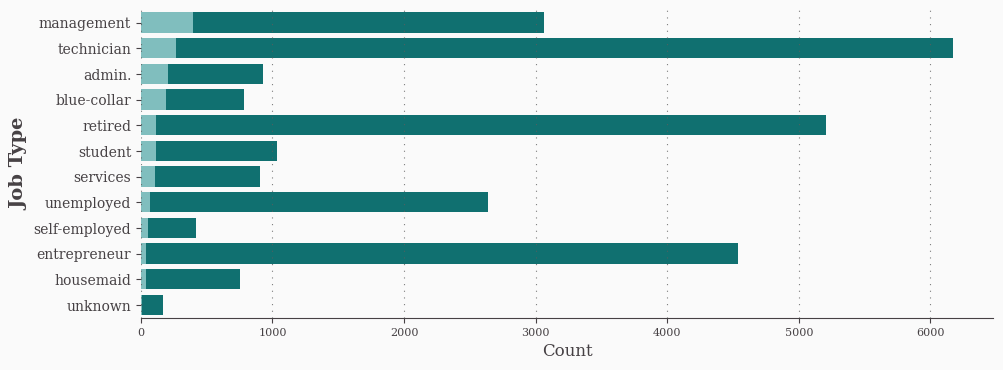

In [272]:
# data
job = data_prep('job', 'subscribed', dataframe = df2)
no_subs = job.query("subscribed == 'no'")
yes_subs = job.query("subscribed == 'yes'").sort_values(by='count', ascending=False)

# canvas
fig = plt.figure(figsize=(11, 4), dpi=100, facecolor=Colors.LightGray) #dpi: độ phân giải
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis='both', which='both', color=Colors.DarkGray)
ax0.grid(
    which="major",
    axis="x",
    zorder=0,
    color=Colors.Gray,
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
for sp in ['top', 'left', 'right']:
    ax0.spines[sp].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)

# plot
sns.barplot(y="job", x="count", data=no_subs, color=Colors.Teal, ax=ax0)
sns.barplot(y="job", x="count", data=yes_subs, color=Colors.Aquamarine, ax=ax0)

# plot setting
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=10)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_ylabel("Job Type",fontfamily="serif", color=Colors.DarkGray, fontsize=14, fontweight="bold")
ax0.set_xlabel("Count",fontfamily="serif", color=Colors.DarkGray, fontsize=12)

fig.show()

Bank tends to contact people with professional job profiles such as blue collar, management and technicians, admin. So, Job is a good feature to predict.

* Education

In [273]:
# check columns order
education = data_prep('education', 'subscribed', dataframe = df2)
yes_subs = education.query("subscribed == 'yes'").sort_values(by='count', ascending=False)
# yes_subs

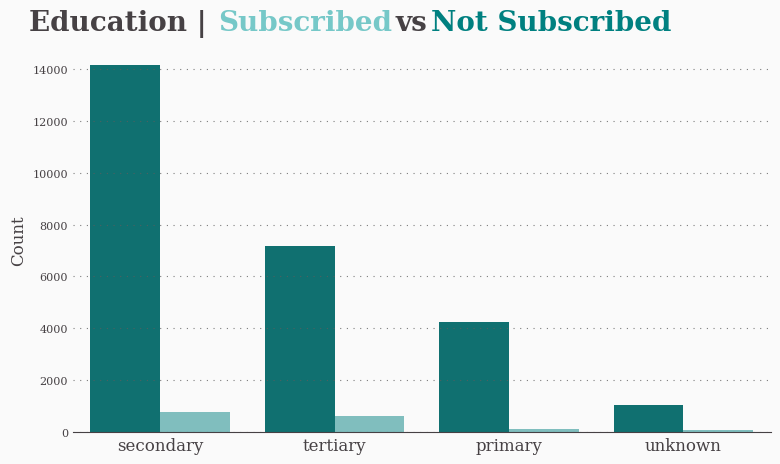

In [274]:
# canvas
fig = plt.figure(figsize=(9, 5), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="both", which="both", length=0)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color=Colors.Gray,
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.set_xlabel("")
ax0.set_ylabel("")
for x in ['top', 'left', 'right']:
    ax0.spines[x].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)

# plot
order = ['secondary', 'tertiary', 'primary', 'unknown']
sns.countplot(
    data=df2,
    x='education',
    hue="subscribed",
    order=['secondary', 'tertiary', 'primary', 'unknown'],
    palette=[Colors.Teal,Colors.Aquamarine]
)

# plot setting
ax0.get_legend().remove()
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=12)
ax0.set_ylabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)
ax0.set_xlabel("")

# text
ax0.text(-0.75,15500,"Education |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(0.33,15500,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine,)
ax0.text(1.35,15500,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(1.55,15500,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)

fig.show()


Clients with higher levels of education tend to subscribe to deposits. The majority effect, perhaps because the bank tends to contact people with higher education. It is a good feature to predict.

* Contact

In [275]:
contact = data_prep('contact', 'subscribed', dataframe = df2)
yes_subs = contact.query("subscribed == 'yes'").sort_values(by='count', ascending=False)
yes_subs

,contact,subscribed,count
1,cellular,yes,1351
5,unknown,yes,144
3,telephone,yes,104


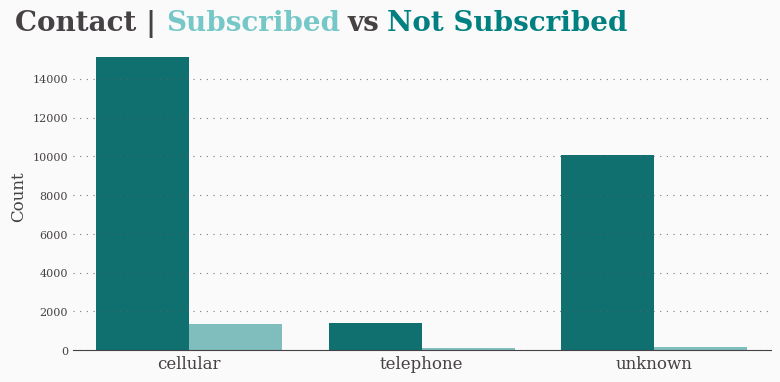

In [276]:
# canvas
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="both", which="both", length=0)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color=Colors.Gray,
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.set_xlabel("")
ax0.set_ylabel("")
for x in ['top', 'left', 'right']:
    ax0.spines[x].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)

# plot
order=['cellular', 'telephone', 'unknown']
sns.countplot(
    data=df2,
    x='contact',
    hue="subscribed",
    palette=[Colors.Teal,Colors.Aquamarine],
    order=order,
    ax=ax0
)

# plot setting
ax0.get_legend().remove()
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=12)
ax0.set_ylabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)
ax0.set_xlabel("")

# text
ax0.text(-0.75,16500,"Contact |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(-0.1,16500,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine,)
ax0.text(0.68,16500,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(0.85,16500,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)

fig.show()

People contacted by cellular subscribe more to deposits.

* Marital

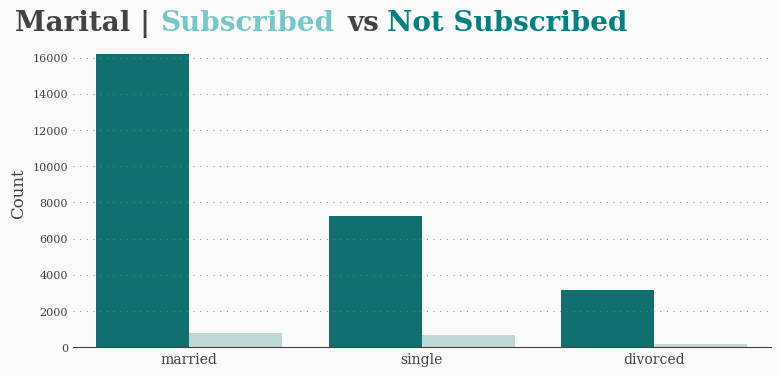

In [277]:
# plot
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment -> axis
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.tick_params(axis="both", which="both", length=0)
ax0.set_xlabel("")
ax0.set_ylabel("")
for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)

# plot
sns.countplot(
    data=df2,
    x="marital",
    hue="subscribed",
    palette=[Colors.Teal, Colors.LightCyan],
    ax=ax0,
)

# plot setting
ax0.get_legend().remove()
ax0.set_xticklabels(
    labels=list(df2["marital"].unique()),
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_xlabel("")
ax0.set_ylabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)

# text
ax0.text(-0.75,17500,"Marital |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(-0.125,17500,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine,)
ax0.text(0.68,17500,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(0.85,17500,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)

fig.show()

People who are married and single tend to subscribe to the term deposit than divorced. Banks are more interested in married people. So banks should contact more single people.

* Poutcome

In [278]:
# check columns order
poutcome = data_prep('poutcome', 'subscribed', dataframe = df2)
yes_subs = poutcome.query("subscribed == 'yes'").sort_values(by='count', ascending=False)
# yes_subs

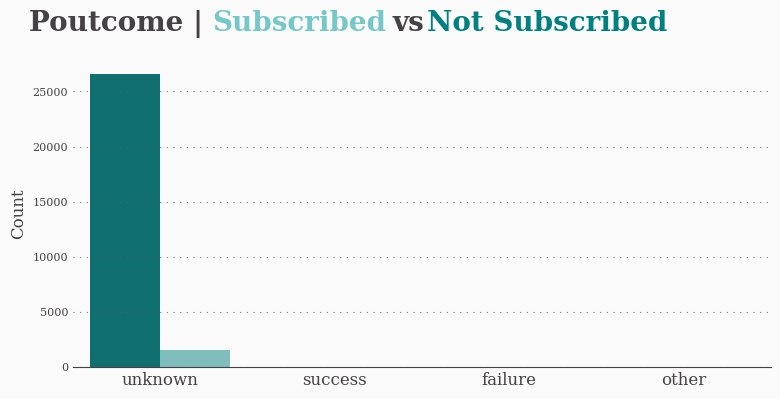

In [279]:
# canvas
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="both", which="both", length=0)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color=Colors.Gray,
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.set_xlabel("")
ax0.set_ylabel("")
for x in ['top', 'left', 'right']:
    ax0.spines[x].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)

# plot
sns.countplot(
    data=df2,
    x='poutcome',
    hue="subscribed",
    order = ['unknown', 'success', 'failure', 'other'],
    palette=[Colors.Teal,Colors.Aquamarine]
)

# plot setting
ax0.get_legend().remove()
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=12)
ax0.set_ylabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)
ax0.set_xlabel("")

# text
ax0.text(-0.75,30500,"Poutcome |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(0.30,30500,"Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine,)
ax0.text(1.33,30500,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray,)
ax0.text(1.53,30500,"Not Subscribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal,)

fig.show()

* Month

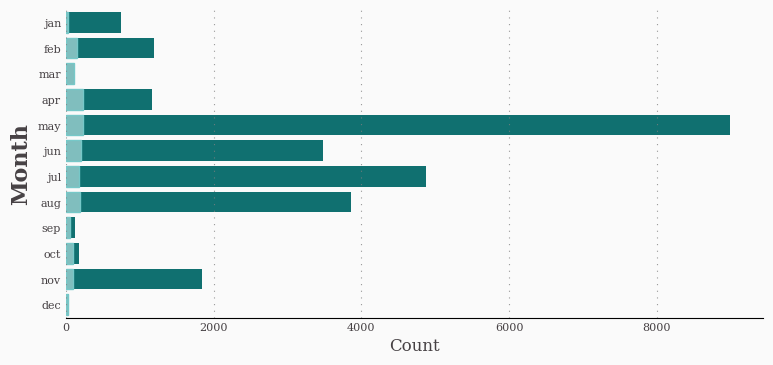

In [280]:
# data
month = data_prep('month', 'subscribed', dataframe = df2)
order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
no_subs = month.query("subscribed == 'no'").set_index('month').loc[order].reset_index()
yes_subs = month.query("subscribed == 'yes'").set_index('month').loc[order].reset_index()

# canvas
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="both", which="both", length=0)
ax0.grid(
    which="major",
    axis="x",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
for x in ['top', 'left', 'right']:
    ax0.spines[x].set_visible(False)

# plot
sns.barplot(x="count", y="month", data=no_subs, color=Colors.Teal, ax=ax0, zorder=0)
sns.barplot(x="count", y="month", data=yes_subs, color=Colors.Aquamarine, ax=ax0, ec=Colors.Aquamarine)

# plot setting
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_xlabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)
ax0.set_ylabel("Month", fontfamily="serif", fontsize=16, color=Colors.DarkGray, fontweight="bold")

fig.show()

* Day

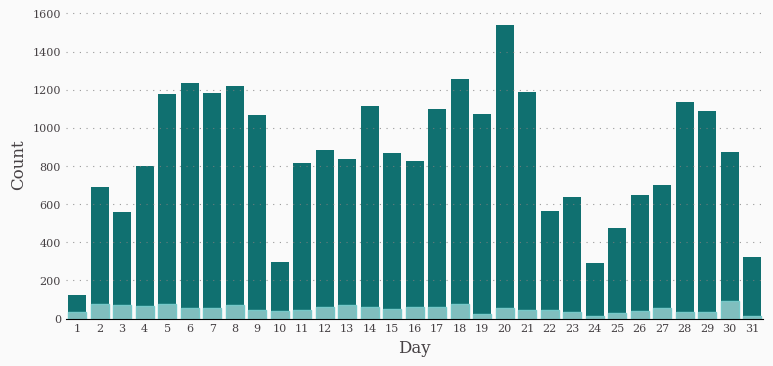

In [281]:
# data
day = data_prep('day', 'subscribed', dataframe = df2)
no_subs = day.query("subscribed == 'no'")
yes_subs = day.query("subscribed == 'yes'")

# canvas
fig = plt.figure(figsize=(9, 4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="both", which="both", length=0)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
for x in ['top', 'left', 'right']:
    ax0.spines[x].set_visible(False)

# plot
sns.barplot(x="day", y="count", data=no_subs, color=Colors.Teal, ax=ax0, zorder=0)
sns.barplot(x="day", y="count", data=yes_subs, color=Colors.Aquamarine, ax=ax0, ec=Colors.Aquamarine)

# plot setting
plt.yticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
plt.xticks(fontfamily="serif", color=Colors.DarkGray, fontsize=8)
ax0.set_ylabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)
ax0.set_xlabel("Day", fontfamily="serif", fontsize=12, color=Colors.DarkGray)

fig.show()

### Binary Variables

* Default, Housing and Loan

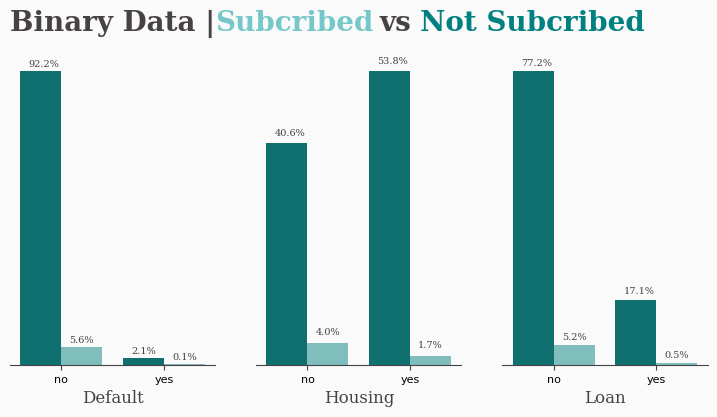

In [282]:
# data
default= data_percent('default', 'subscribed', dataframe=df2)
housing= data_percent('housing', 'subscribed', dataframe=df2)
loan= data_percent('loan', 'subscribed', dataframe=df2)

# canvas
fig = plt.figure(figsize=(9,4), dpi=100, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1,3)

# alignment
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[0, ax])
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].tick_params(axis="x", labelsize=8, color=Colors.DarkGray)
    locals()["axis"+str(ax)].get_yaxis().set_visible(False)

    spines = ["top", "left", "right"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)
        locals()["axis"+str(ax)].spines['bottom'].set_color(Colors.DarkGray)

# plot
for ax, data in zip(range(0, 3), [default, housing, loan]):
    sns.barplot(data= data, x=data.columns[0], y='percentage', hue='subscribed', ax=locals()["axis" + str(ax)], palette=[Colors.Teal, Colors.Aquamarine])
    locals()["axis" + str(ax)].set_xlabel(
        data.columns[0].title(), fontfamily="serif", fontsize=12, color=Colors.DarkGray
    )
    for p in locals()['axis'+str(ax)].patches:
        locals()['axis'+str(ax)].annotate(f'{round(p.get_height(), 1)}%', (p.get_x()+0.08, p.get_height()+1.5), fontsize=7,fontweight='normal', fontfamily='serif', color=Colors.DarkGray)
    locals()["axis" + str(ax)].get_legend().remove()
# text
axis0.text(-0.5,105,"Binary Data |",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
axis0.text(1.5,105,"Subcribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Aquamarine)
axis0.text(3.5,105,"Not Subcribed",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.Teal)
axis0.text(3.1,105,"vs",fontfamily="serif",fontsize=20,fontweight="bold",color=Colors.DarkGray)
fig.show()


A high proportion of non-default corresponds to total time deposit recipients. It seems reasonable that people with credit wouldn't want to subscribe to a new bank.

People without housing loans are in a higher proportion who decide to subscribe to deposits

Clients who do not have personal loans tend to be willing to accept deposit offers.

* Subscribed

Text(-0.15, 1.3, 'Not Subcribed')

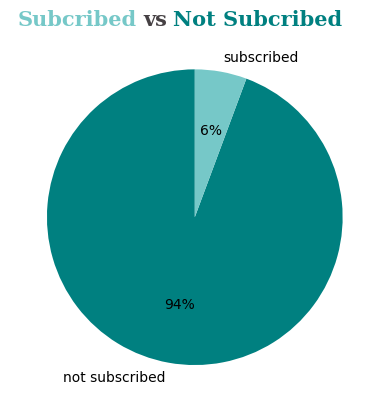

In [283]:
# data
subs = data_prep('subscribed', dataframe=df2)
subs.subscribed.replace(
    {
        'yes': 'subscribed',
        'no': 'not subscribed'
    }
, inplace=True)
# plot

plt.pie(data=subs, x='count', labels='subscribed', colors=[Colors.Teal,Colors.Aquamarine], autopct='%.0f%%', startangle=90)

# text
plt.text(-1.2,1.3,"Subcribed",fontfamily="serif",fontsize=15,fontweight="bold",color=Colors.Aquamarine)
plt.text(-0.35,1.3,"vs",fontfamily="serif",fontsize=15,fontweight="bold",color=Colors.DarkGray)
plt.text(-0.15,1.3,"Not Subcribed",fontfamily="serif",fontsize=15,fontweight="bold",color=Colors.Teal)


# 3. Data Processing

## Replace 'unknown' values

In [284]:
col_unknown = ['job', 'education', 'contact']
for col in col_unknown:
    print(f'- Mode column {col} = {df2[col].mode()}')
    df2[col].replace(['unknown'], df2[col].mode(), inplace=True)

- Mode column job = 0    blue-collar
Name: job, dtype: object
- Mode column education = 0    secondary
Name: education, dtype: object
- Mode column contact = 0    cellular
Name: contact, dtype: object


<ipython-input-284-6de84d47b95b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].replace(['unknown'], df2[col].mode(), inplace=True)
<ipython-input-284-6de84d47b95b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].replace(['unknown'], df2[col].mode(), inplace=True)
<ipython-input-284-6de84d47b95b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col].replace(['unknown'], df2[col].mode(), inplace=True)


## Determine Feature and Target

In [285]:
y = df2['subscribed']
X = df2.drop(columns = ['day', 'month', 'campaign', 'pdays', 'poutcome', 'previous', 'subscribed'])
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration
0,58,management,married,tertiary,no,2143,yes,no,cellular,261
1,44,technician,single,secondary,no,29,yes,no,cellular,151
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,76
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,92
4,33,blue-collar,single,secondary,no,1,no,no,cellular,198


## Encoding categorical features

In [286]:
# replace 'yes' with 1 and 'no' with 0
X.replace(
    {
        'yes': 1,
        'no': 0
    }
,inplace=True)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration
0,58,management,married,tertiary,0,2143,1,0,cellular,261
1,44,technician,single,secondary,0,29,1,0,cellular,151
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,76
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,92
4,33,blue-collar,single,secondary,0,1,0,0,cellular,198


In [287]:
# categorical columns
onehot= pd.get_dummies(X[['job','marital', 'education', 'contact']])
onehot.head(3)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [288]:
# Join 2 dataframe
X = pd.concat([X, onehot], axis=1)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,management,married,tertiary,0,2143,1,0,cellular,261,...,0,0,0,1,0,0,0,1,1,0
1,44,technician,single,secondary,0,29,1,0,cellular,151,...,1,0,0,0,1,0,1,0,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,76,...,0,0,0,1,0,0,1,0,1,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,92,...,0,0,0,1,0,0,1,0,1,0
4,33,blue-collar,single,secondary,0,1,0,0,cellular,198,...,0,0,0,0,1,0,1,0,1,0


In [289]:
# Drop unnecessary columns
X.drop(columns = ['job','marital', 'education', 'contact'], inplace=True)
X.head()

,age,default,balance,housing,loan,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone
0,58,0,2143,1,0,261,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,44,0,29,1,0,151,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,33,0,2,1,1,76,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
3,47,0,1506,1,0,92,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,33,0,1,0,0,198,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


## Train - Test Split

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Handling Imbalanced Features

Choosing the best method of handling imbalanced features

In [291]:
# RandomOverSampler
ROS_Model=RandomOverSampler()
X_over, y_over=ROS_Model.fit_resample(X_train,y_train)
X_over.shape, y_over.shape

((37202, 25), (37202,))

In [292]:
# Test on LogisticRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_over, y_over)
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          no       0.99      0.77      0.86      7993
         yes       0.17      0.80      0.27       465

    accuracy                           0.77      8458
   macro avg       0.58      0.78      0.57      8458
weighted avg       0.94      0.77      0.83      8458



Text(0.5, 23.52222222222222, 'Predict')

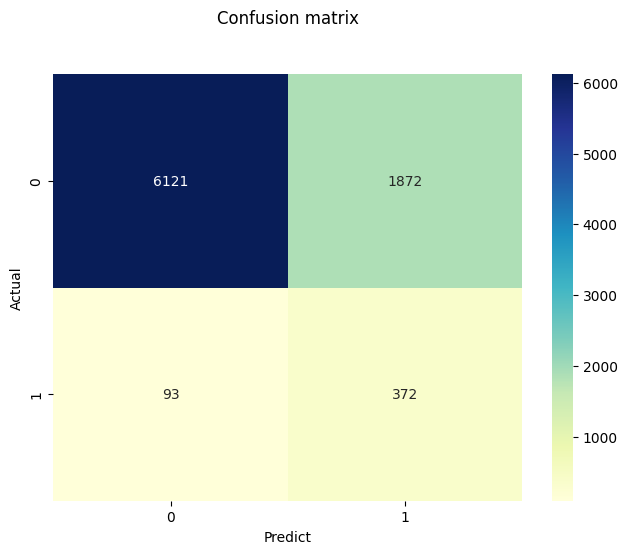

In [293]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

In [294]:
# SMOTE
SM_Model=SMOTE()
X_SM, y_SM=SM_Model.fit_resample(X_train,y_train)
X_SM.shape, y_SM.shape

((37202, 25), (37202,))

In [295]:
model = LogisticRegression()
model.fit(X_SM, y_SM)
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          no       0.96      0.95      0.95      7993
         yes       0.26      0.31      0.28       465

    accuracy                           0.91      8458
   macro avg       0.61      0.63      0.62      8458
weighted avg       0.92      0.91      0.92      8458



Text(0.5, 23.52222222222222, 'Predict')

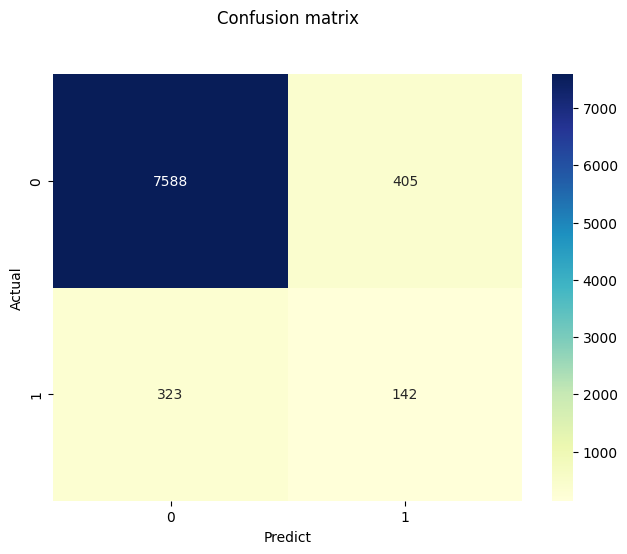

In [296]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

# 4. Modeling

## Logistic Regression

In [297]:
model_Log = LogisticRegression()
model_Log.fit(X_SM, y_SM)
Log_pred = model_Log.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [298]:
model_Log.score(X_test,y_test)

0.9139276424686688

## Naive Bayes

In [299]:
model_GNB = GaussianNB()
model_GNB.fit(X_SM, y_SM)
GNB_pred=model_GNB.predict(X_test)

## Decision Tree

In [300]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_SM, y_SM)
tree_pred=model_tree.predict(X_test)

# 5. Evaluate

## Confussion Matrix

Text(0.8, -0.3, 'Decision Tree')

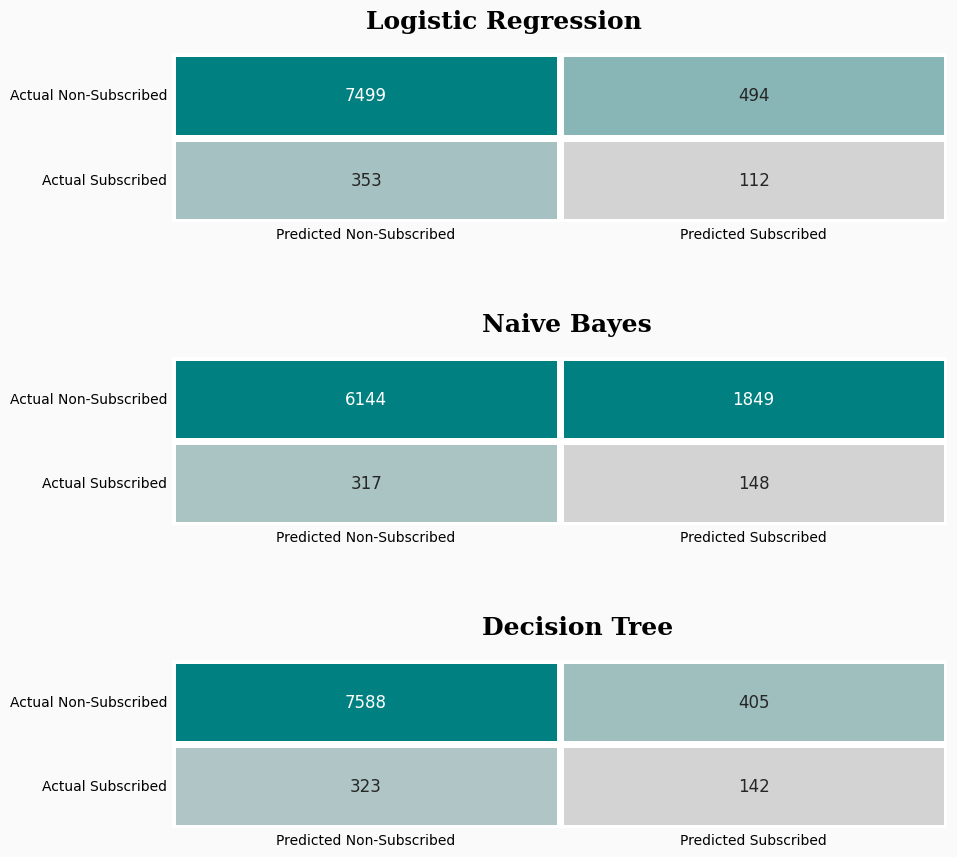

In [301]:
colors = ['lightgray',Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal,Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# canvas
fig = plt.figure(figsize=(10,14), facecolor=Colors.LightGray)
gs = fig.add_gridspec(4, 2, wspace=0.1, hspace=0.8)

# setting
for ax in range(3):
    locals()['ax'+str(ax)] = fig.add_subplot(gs[ax, :])
    locals()['ax'+str(ax)].set_facecolor(Colors.LightGray)
    locals()['ax'+str(ax)].tick_params(axis=u'both', which=u'both',length=0)

# plot
Log_cm = confusion_matrix(y_test, Log_pred)
sns.heatmap(Log_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax2,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})

GNB_cm = confusion_matrix(y_test, GNB_pred)
sns.heatmap(GNB_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax1,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})

tree_cm = confusion_matrix(y_test, tree_pred)
sns.heatmap(tree_cm, cmap=colormap,annot=True,fmt="d", linewidths=5,cbar=False,ax=ax0,
            yticklabels=['Actual Non-Subscribed','Actual Subscribed'],xticklabels=['Predicted Non-Subscribed','Predicted Subscribed'],annot_kws={"fontsize":12})

# text
ax0.text(0.5,-0.3,'Logistic Regression',fontsize=18,fontweight='bold',fontfamily='serif')
ax1.text(0.8,-0.3,'Naive Bayes',fontsize=18,fontweight='bold',fontfamily='serif')
ax2.text(0.8,-0.3,'Decision Tree',fontsize=18,fontweight='bold',fontfamily='serif')

## Model Comparison

In [302]:
models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier()]
times = []
F1 = []
accuracy = []
recall = []
precision = []
name=[]
for model in models:
  t1 = datetime.datetime.now()
  model_name = model.__class__.__name__
  model.fit(X_SM, y_SM)
  t2 = datetime.datetime.now()
  d = round((t2 - t1).microseconds/1000,1)
  y_pred2 = model.predict(X_test)
  F1.append(round(metrics.f1_score(y_test, y_pred2, pos_label='yes')*100,1))
  accuracy.append(round(metrics.accuracy_score(y_test, y_pred2)*100,1))
  recall.append(round(metrics.recall_score(y_test, y_pred2, pos_label='yes')*100,1))
  precision.append(round(metrics.precision_score(y_test, y_pred2, pos_label='yes')*100,1))
  times.append(d)
  name.append(model_name)
comparison_models = pd.DataFrame(np.column_stack([name, F1, accuracy, recall, precision, times]),columns=['Name', 'F1 score (%)', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'Time (s)'])
comparison_models

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Name,F1 score (%),Accuracy (%),Recall (%),Precision (%),Time (s)
0,LogisticRegression,28.1,91.4,30.5,26.0,27.0
1,GaussianNB,12.0,74.4,31.8,7.4,118.1
2,DecisionTreeClassifier,20.2,89.9,23.2,17.9,274.6


- Logistic Regression has the best F1 score, Accuracy and Precison score. It takes only 27s to process.
- Naive Bayes has the lowest metric evaluation value among the three types of classification.
- Decision Tree is a good model. But the Logistic Regression is better.

So, Logistic regression is the model chosen for the production process.